## 한글 폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,173 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# Facebook Prophet을 활용한 시계열 데이터 예측 모델

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- Facebook Prophet을 활용하여 주가 예측

## 필요한 모듈 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [3]:
!pip install finance-datareader

In [4]:
import FinanceDataReader as fdr

In [5]:
# 삼성전자 종목코드: 005930
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [6]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-02-24,72300,72300,71300,71500,15759283,-0.020548
2022-02-25,72100,72600,71900,71900,13168484,0.005594
2022-02-28,71100,72100,71000,72100,17781783,0.002782
2022-03-02,72300,72400,71500,71700,12481430,-0.005548
2022-03-03,72300,73100,72200,72900,13033294,0.016736


**미국 주식 데이터**도 가져올 수 있습니다.

In [7]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [8]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-02-24,162.74,152.58,162.85,152.00,140170000.0,0.0167
2022-02-25,164.85,163.84,165.12,160.87,91970000.0,0.0130
2022-02-28,165.12,163.06,165.42,162.43,92550000.0,0.0016
2022-03-01,163.20,164.70,166.60,161.97,83190000.0,-0.0116
2022-03-02,166.56,164.39,167.36,162.95,79510000.0,0.0206


### 비트코인 시세

In [9]:
btc = fdr.DataReader('BTC/KRW', '2018-01-01')
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-01,18655000,19208000,19296000,18362000,10240.0,-0.0288
2018-01-02,19838000,18655000,20800000,18570000,17460.0,0.0634
2018-01-03,20419000,19838000,20810000,19800000,15670.0,0.0293
2018-01-04,21576000,20419000,21830000,19891000,14730.0,0.0567
2018-01-05,25026000,21576000,25988000,21046000,25290.0,0.1599
...,...,...,...,...,...,...
2022-02-27,46299000,47766000,48500000,45645000,1420.0,-0.0310
2022-02-28,52152000,46275000,52970000,46059000,2470.0,0.1264
2022-03-01,53798000,52173000,54645000,51904000,1020.0,0.0316


## 시세에 대한 그래프 시각화

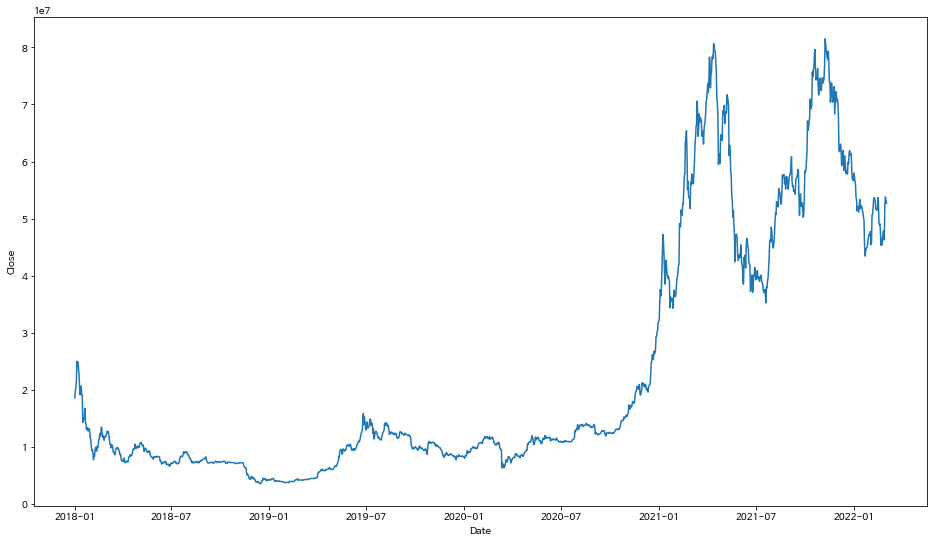

In [10]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

**시작**과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [11]:
# 비트코인 시세
btc = fdr.DataReader('BTC/KRW', '2019-01-01', '2020-12-01')
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-01,4289000,4199000,4300000,4137000,3230.0,0.0214
2019-01-02,4345000,4294000,4360000,4244000,3860.0,0.0131
2019-01-03,4282000,4352000,4367000,4259000,15370.0,-0.0145
2019-01-04,4309000,4286000,4334000,4243000,19200.0,0.0063
2019-01-05,4297000,4309000,4354000,4278000,24870.0,-0.0028
...,...,...,...,...,...,...
2020-11-27,19119000,19236000,19236000,19119000,1440.0,-0.0067
2020-11-28,19480000,19118000,19480000,19118000,1610.0,0.0189
2020-11-29,20002000,19480000,20002000,19281000,830.0,0.0268


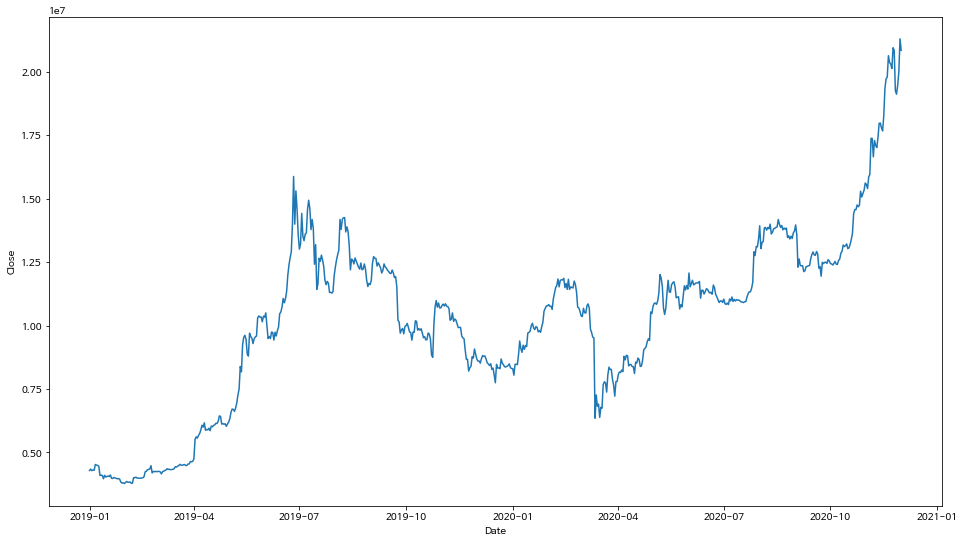

In [12]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

그 밖에 **금, 은과 같은 현물**, **달러와 같은 화폐** 데이터도 가져올 수 있습니다.

더욱 자세한 내용은 [GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader)를 참고해 보시기 바랍니다.

## 주가데이터 가져오기

In [13]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [14]:
stock = fdr.DataReader(STOCK_CODE)

In [15]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-19,1270,1292,1234,1293,435010,NaN
1998-01-20,1394,1394,1348,1394,1571310,0.078113
1998-01-21,1388,1388,1283,1320,1163080,-0.053085
1998-01-22,1307,1325,1214,1215,905730,-0.079545
1998-01-23,1234,1263,1200,1262,616720,0.038683


In [16]:
stock.index

DatetimeIndex(['1998-01-19', '1998-01-20', '1998-01-21', '1998-01-22',
               '1998-01-23', '1998-01-24', '1998-01-26', '1998-01-30',
               '1998-01-31', '1998-02-02',
               ...
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-02', '2022-03-03'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-19,1270,1292,1234,1293,435010,NaN
1998-01-20,1394,1394,1348,1394,1571310,0.078113
1998-01-21,1388,1388,1283,1320,1163080,-0.053085
1998-01-22,1307,1325,1214,1215,905730,-0.079545
1998-01-23,1234,1263,1200,1262,616720,0.038683


## 시각화

Text(0, 0.5, 'price')

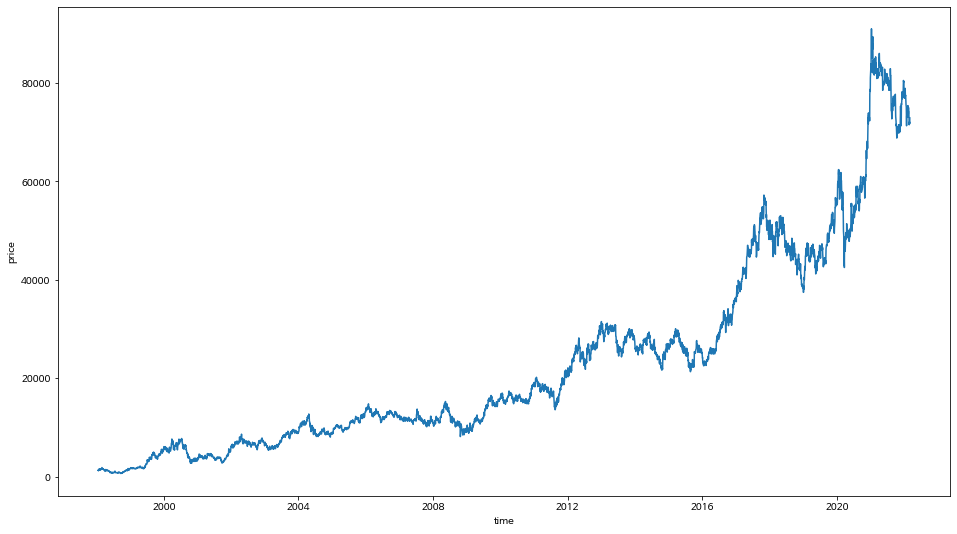

In [19]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

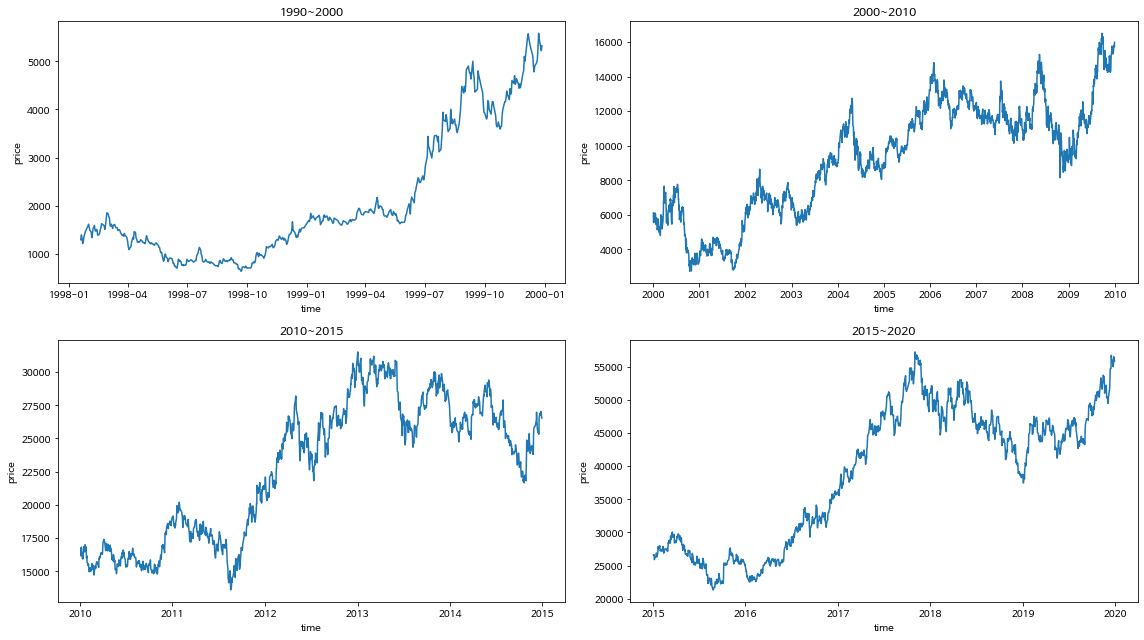

In [20]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [21]:
stock = fdr.DataReader(STOCK_CODE, '2019')

## Prophet

### 모듈 import

In [5]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

### 컬럼

- 반드시 **y** 컬럼과 **ds** 컬럼이 존재해야합니다.
- 예측 값은 **y**, 시계열 데이터는 **ds**에 지정합니다.

In [23]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [24]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38750,2019-01-02
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,37600,2019-01-03
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,37450,2019-01-04
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38750,2019-01-07
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38100,2019-01-08


### prophet 객체 선언 및 학습

In [25]:
m = Prophet()
m.fit(stock)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**period**에 예측 하고 싶은 기간을 입력 합니다.

예측할 시계열 row가 추가 됩니다.

`periods`에 예측할 기간을 입력합니다.

In [26]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
807,2022-03-29
808,2022-03-30
809,2022-03-31
810,2022-04-01
811,2022-04-02


- `predict`로 예측을 진행합니다.
- `predict` 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.


In [27]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
807,2022-03-29,64977.011980,61557.777294,66284.397261,64719.624106,65175.309531,-1161.022230,-1161.022230,-1161.022230,-1099.897891,-1099.897891,-1099.897891,-61.124339,-61.124339,-61.124339,0.0,0.0,0.0,63815.989750
808,2022-03-30,64901.958797,61417.334738,66131.997522,64627.420694,65123.257199,-1127.309027,-1127.309027,-1127.309027,-1145.413475,-1145.413475,-1145.413475,18.104448,18.104448,18.104448,0.0,0.0,0.0,63774.649770
809,2022-03-31,64826.905615,61208.118601,66014.147794,64530.940859,65070.740355,-1120.474251,-1120.474251,-1120.474251,-1229.013021,-1229.013021,-1229.013021,108.538770,108.538770,108.538770,0.0,0.0,0.0,63706.431364
810,2022-04-01,64751.852432,61423.327521,66024.325401,64430.663066,65012.277303,-1056.924219,-1056.924219,-1056.924219,-1264.278127,-1264.278127,-1264.278127,207.353908,207.353908,207.353908,0.0,0.0,0.0,63694.928213
811,2022-04-02,64676.799250,65577.837945,70498.810125,64331.840320,64952.053611,3322.891756,3322.891756,3322.891756,3011.220250,3011.220250,3011.220250,311.671505,311.671505,311.671505,0.0,0.0,0.0,67999.691005


In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
772,2022-02-17,74444.342146,72185.751548,76711.575368
773,2022-02-18,74274.144481,71817.372452,76681.229509
774,2022-02-21,73743.950446,71333.468749,76036.949978
775,2022-02-22,73717.392161,71273.111292,75991.928565
776,2022-02-23,73439.523869,71040.078699,75711.008268
777,2022-02-24,73101.227928,70851.755877,75278.957885
778,2022-02-25,72788.819005,70343.631986,75032.360008
779,2022-02-28,71808.039354,69342.764076,74211.805405
780,2022-03-02,71209.182039,68840.984393,73365.991044
781,2022-03-03,70733.409780,68149.019029,72975.881609


### 시각화

`plot`은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.

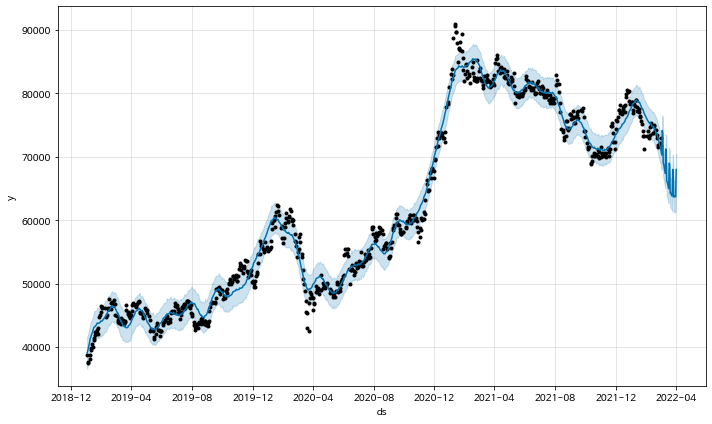

In [29]:
fig = m.plot(forecast)

### plotly 활용

In [31]:
fig = plot_plotly(m, forecast)
fig

### 컴포넌트 별 시각화

컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.

**trend, yearly, weekly 데이터를 시각화**하여 보여 줍니다.

In [32]:
plot_components_plotly(m, forecast)

### change points

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [33]:
from fbprophet.plot import add_changepoints_to_plot

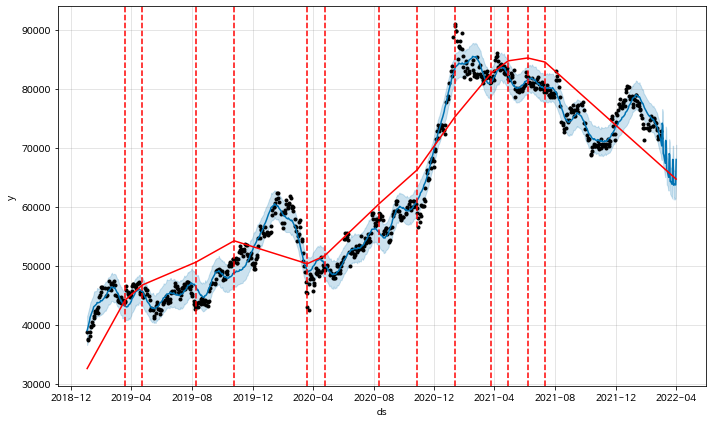

In [34]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

flexibility **계수가 낮으면 과소적합, 높으면 과대적합**하여 예측하게 됩니다.

중요한 hyperparameter 입니다.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


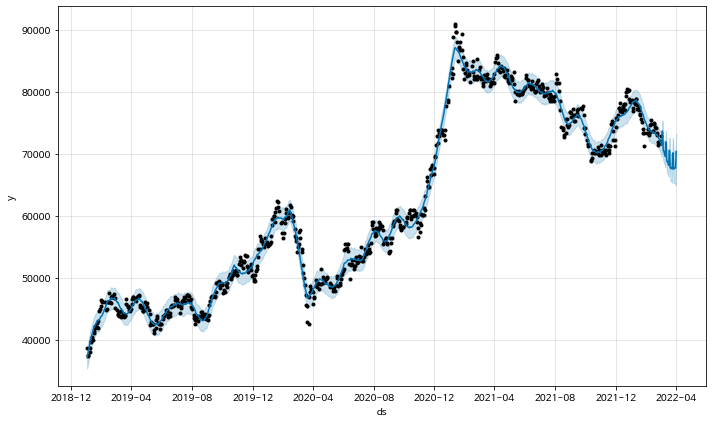

In [35]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


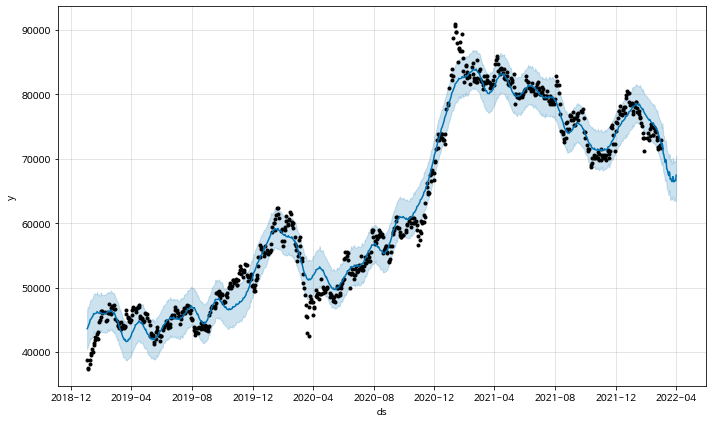

In [36]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

## 서울시 코로나 확진자 현황

[데이터셋 다운로드](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)

In [6]:
# 서울시 코로나 확진자 데이터 다운로드
!wget -O seoul_covid.csv https://www.dropbox.com/s/vv9mh6ciq9xnart/seoul_covid19.csv?dl=1

--2022-03-04 02:56:41--  https://www.dropbox.com/s/vv9mh6ciq9xnart/seoul_covid19.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/vv9mh6ciq9xnart/seoul_covid19.csv [following]
--2022-03-04 02:56:41--  https://www.dropbox.com/s/dl/vv9mh6ciq9xnart/seoul_covid19.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8ef6c60493161d48a2368b959.dl.dropboxusercontent.com/cd/0/get/Bgw54HDQ9TwyaLlti8pAWU2QDjvFvY8jgmUD42NuGR8WDizyyeio70gOk-_jOD6mTCQNm-TMl2lRDVCgtOf5oCSKH8k5xiFNayextzYjuek1JnmCXVMa1u752TmnTi7qm_ZSPBVCglw-BOhiMmk_CZl7/file?dl=1# [following]
--2022-03-04 02:56:42--  https://uca8ef6c60493161d48a2368b959.dl.dropboxusercontent.com/cd/0/get/Bgw54HDQ9TwyaLlti8pAWU2QDjvFvY8jgmUD42NuGR8WDizyyeio70gOk-_jOD6mTCQNm-TMl

In [7]:
corona = pd.read_csv('seoul_covid.csv')
corona

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


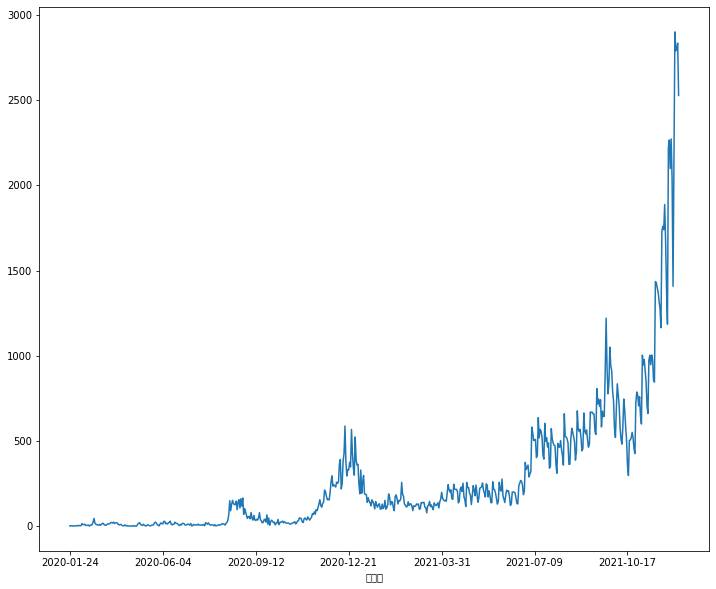

In [8]:
plt.figure(figsize=(12, 10))
corona.groupby('확진일')['연번'].count().plot()
plt.show()

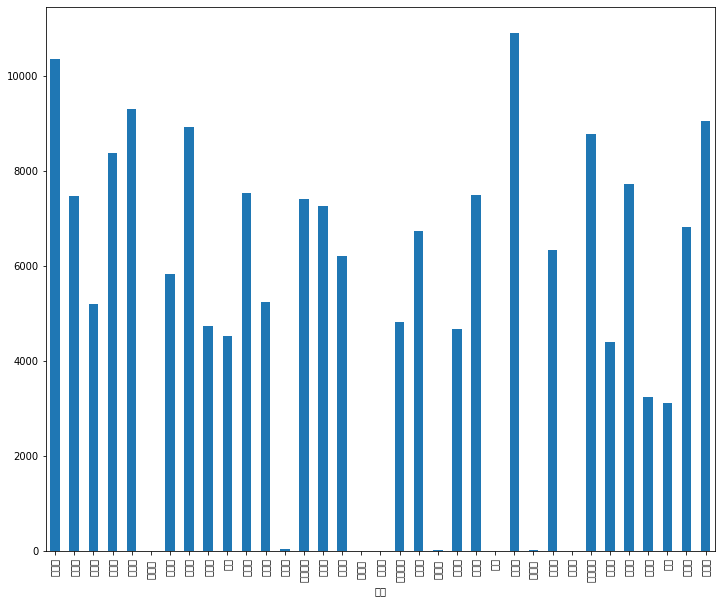

In [9]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

## 정확한 분석을 위한 데이터 클린징

공백이 들어간 경우

In [10]:
corona.loc[corona['지역'] == '관악구 ']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1428,181130,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1464,181094,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1774,180784,2021-12-11,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
12155,170403,2021-12-07,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


공백이 들어가지 않은 경우

In [11]:
corona.loc[corona['지역'] == '관악구']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
40,182518,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
51,182507,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
70,182488,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
91,182467,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
200,182358,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182440,118,2020-03-07,6845.0,NaN,510419-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182471,87,2020-02-29,3491.0,NaN,690602-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182484,74,2020-02-28,2466.0,NaN,700817-1,관악구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182505,53,2020-02-26,1295.0,NaN,800216-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


공백을 제거하는 함수 `strip()`활용

In [12]:
corona['지역'].apply(lambda x: x.strip())

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [13]:
corona['지역'] = corona['지역'].apply(lambda x: x.strip())

공백이 들어간 데이터가 제거되었음을 확인합니다.

In [14]:
corona.loc[corona['지역'] == '관악구 ']

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


**구**가 빠진 지역명은 구를 추가합니다.

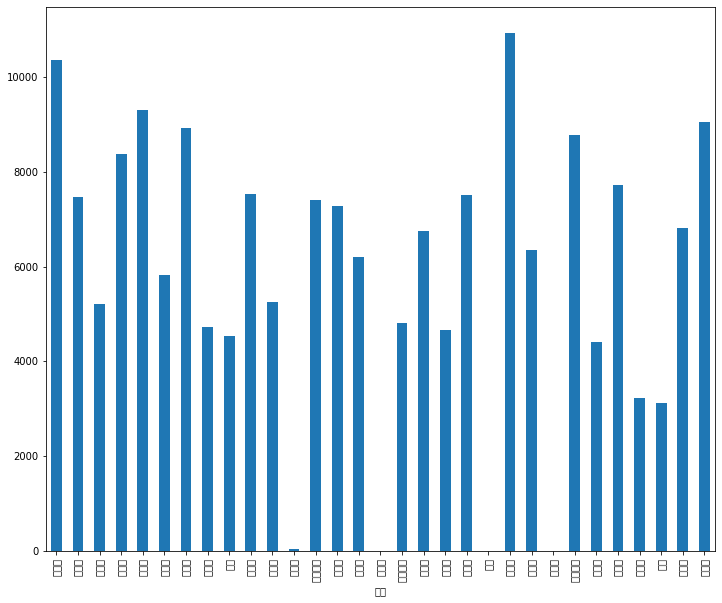

In [15]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

In [16]:
target = ['동대문', '서대문', '송파', '영등포']

In [17]:
corona['지역'].apply(lambda x: x + '구' if x in target else x).value_counts()

송파구     10932
강남구     10358
관악구      9300
타시도      9057
구로구      8932
영등포구     8779
강서구      8376
은평구      7721
노원구      7535
성북구      7504
강동구      7479
동대문구     7431
동작구      7273
중랑구      6815
서초구      6750
양천구      6341
마포구      6202
광진구      5826
도봉구      5251
강북구      5208
서대문구     4817
금천구      4735
성동구      4665
기타       4529
용산구      4399
종로구      3232
중구       3111
Name: 지역, dtype: int64

In [18]:
corona['지역'] = corona['지역'].apply(lambda x: x + '구' if x in target else x)

지역이 깔끔하게 전처리 되었음을 확인합니다.

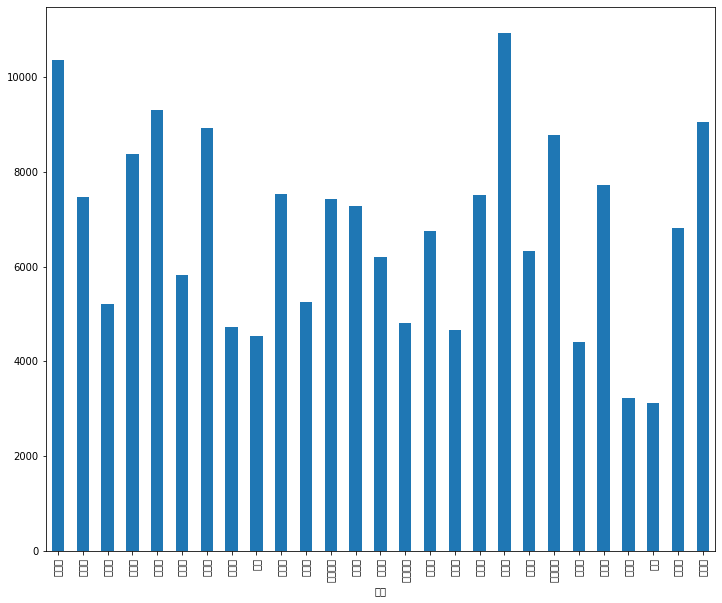

In [19]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

확진자 숫자를 기준으로 오름차순 정렬합니다.

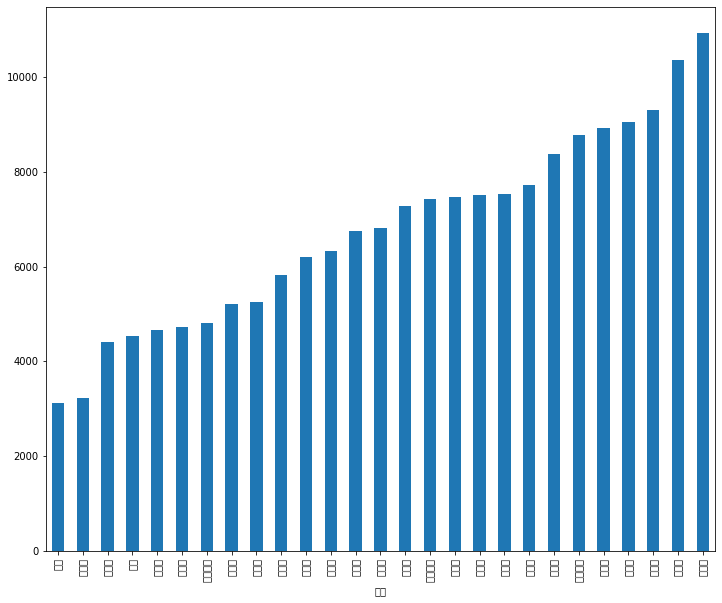

In [20]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().sort_values().plot(kind='bar')
plt.show()

In [21]:
import folium
import requests
import json

In [22]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [23]:
# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

In [24]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=corona.groupby('지역')['연번'].count().sort_values(),
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.3,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name=f'코로나 확진자 현황', 
            )
m

In [25]:
corona.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [26]:
corona_df = corona.groupby('확진일')['연번'].count().reset_index()
corona_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [27]:
corona_df.columns = ['ds', 'y']
corona_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [28]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

m = Prophet(changepoint_prior_scale=5.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
m.fit(corona_df)

In [29]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [30]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
681,2022-01-06,1859.041563,1632.962947,2140.716754,1776.729838,1973.536701,26.724617,26.724617,26.724617,26.724617,26.724617,26.724617,0.0,0.0,0.0,1885.766180
682,2022-01-07,1869.489891,1634.596258,2158.563637,1781.356464,1990.718717,22.632849,22.632849,22.632849,22.632849,22.632849,22.632849,0.0,0.0,0.0,1892.122740
683,2022-01-08,1879.938219,1623.941602,2144.254424,1784.799322,2007.205169,-3.263943,-3.263943,-3.263943,-3.263943,-3.263943,-3.263943,0.0,0.0,0.0,1876.674276
684,2022-01-09,1890.386547,1576.382994,2093.121469,1792.240600,2025.797049,-59.650513,-59.650513,-59.650513,-59.650513,-59.650513,-59.650513,0.0,0.0,0.0,1830.736034
685,2022-01-10,1900.834875,1556.498024,2136.059366,1797.400590,2039.461839,-55.978654,-55.978654,-55.978654,-55.978654,-55.978654,-55.978654,0.0,0.0,0.0,1844.856221


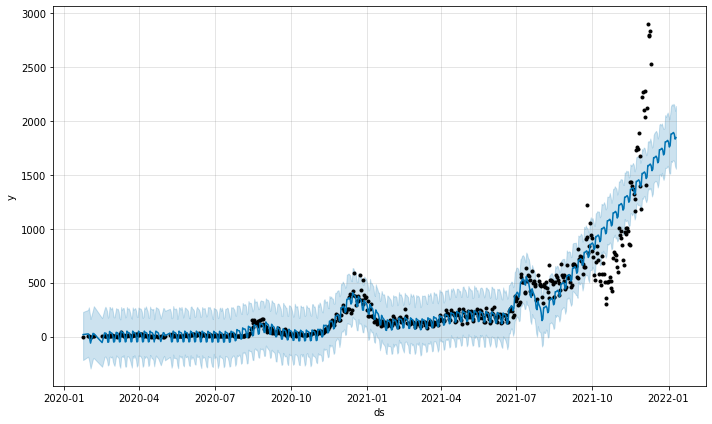

In [31]:
fig = m.plot(forecast)

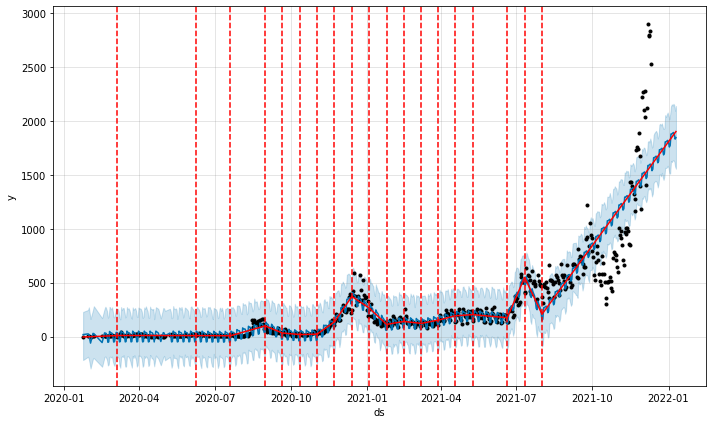

In [32]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

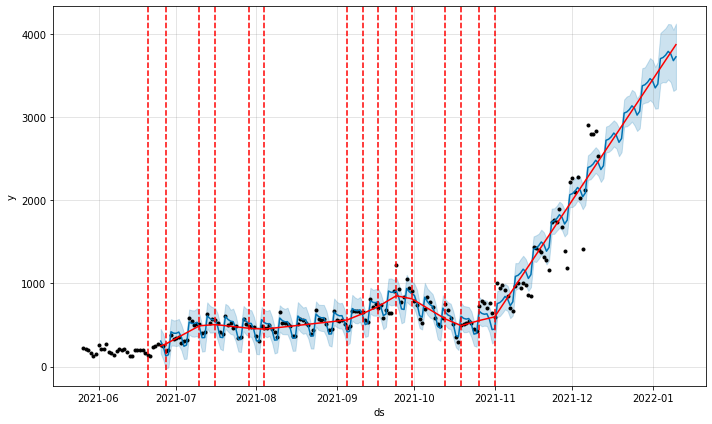

In [33]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 200
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

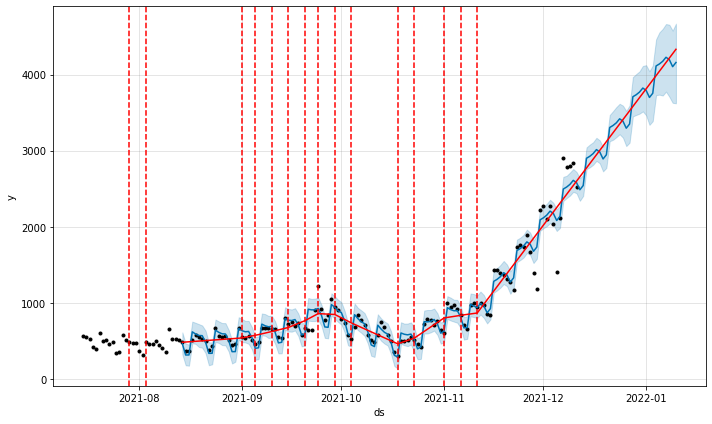

In [34]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 150
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

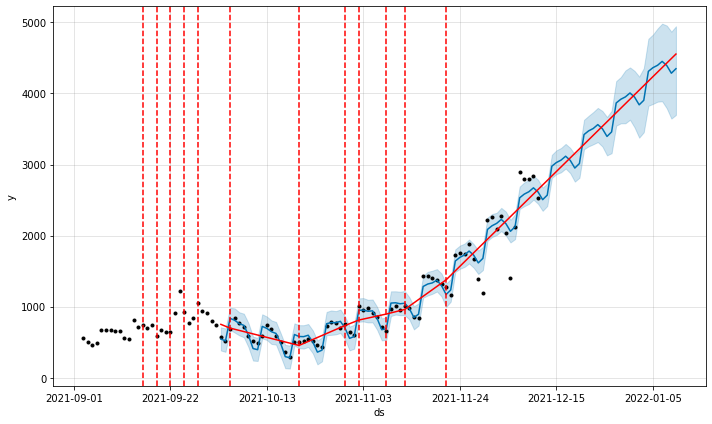

In [35]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 100
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)